In [1]:
from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
qr = QuantumRegister(6)
cr = ClassicalRegister(6)
qc = QuantumCircuit(qr, cr)

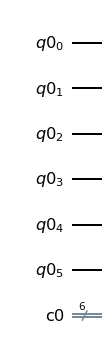

In [3]:
%matplotlib inline
qc.draw(output='mpl')

In [4]:
def make_entanglement(qc, a, b):
    qc.h(a)
    qc.cx(a, b)

In [5]:
def make_communicate(qc, a, b):
    qc.cx(a, b)
    qc.h(a)

In [6]:
def measure_pair(qc, a, b):
    qc.measure(a, a)
    qc.measure(b, b)

In [7]:
for qubit in range(3):
    make_entanglement(qc, qubit*2, qubit*2 + 1)

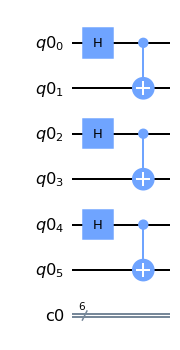

In [8]:
qc.draw(output='mpl')

In [9]:
qc.barrier()
for qubit in range(1,4,2):
    make_communicate(qc, qubit, qubit+1)

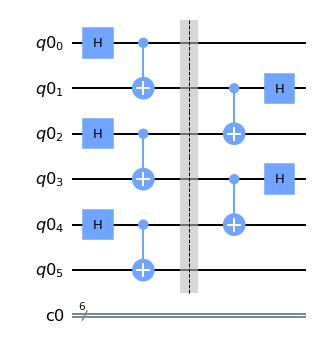

In [10]:
qc.draw(output='mpl')

In [11]:
qc.barrier()
qc.cx(2, 5)
qc.cx(4, 5) 
qc.cz(1, 0)
qc.cz(3, 0) 

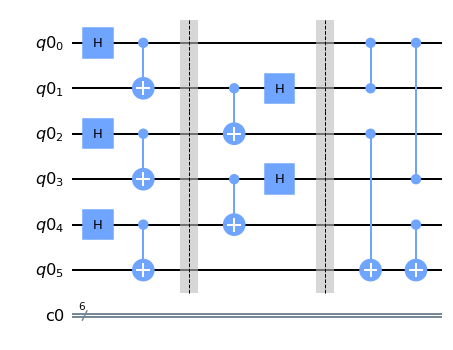

In [12]:
qc.draw(output='mpl')

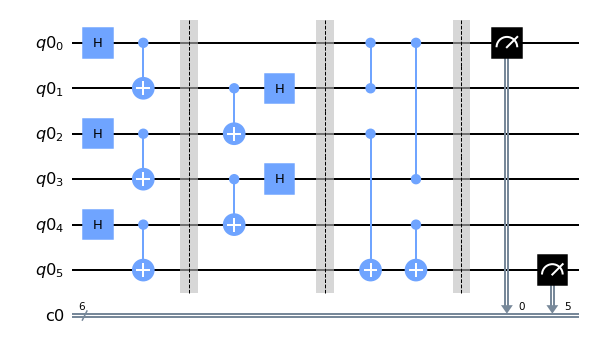

In [13]:
qc.barrier()
measure_pair(qc, 0, 5)
qc.draw(output='mpl')

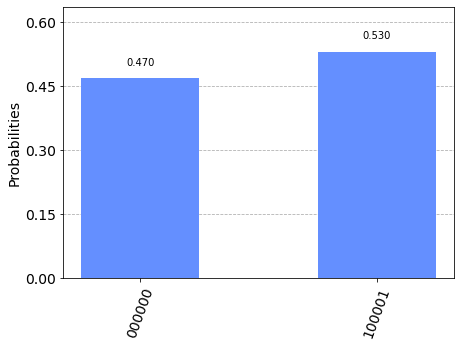

In [14]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator).result()
plot_histogram(result.get_counts(qc))

In [15]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(qc, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


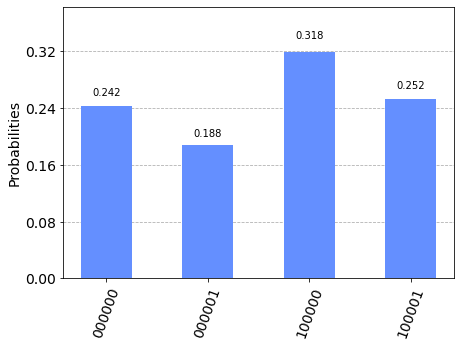

In [16]:
result = job.result()
plot_histogram(result.get_counts(qc))

In [18]:
counts = result.get_counts(qc)
print(f"The experimental error rate : {(1 - (counts['000000'] + counts['100001'])/sum(counts.values())) * 100 :.3f}%")

The experimental error rate : 50.586%
